<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_4_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 4: Perceptron and Gradient Descent
# Lab 3: Gradient Descent
Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.



# 1] Change batch size in mini-batch gradient descent.
# 2] Test all the three out on real datasets.
# 3] Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

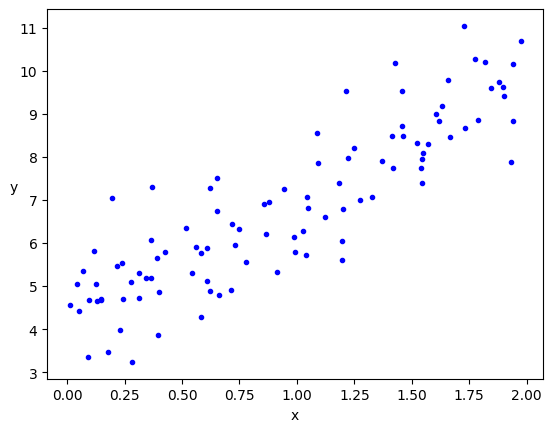

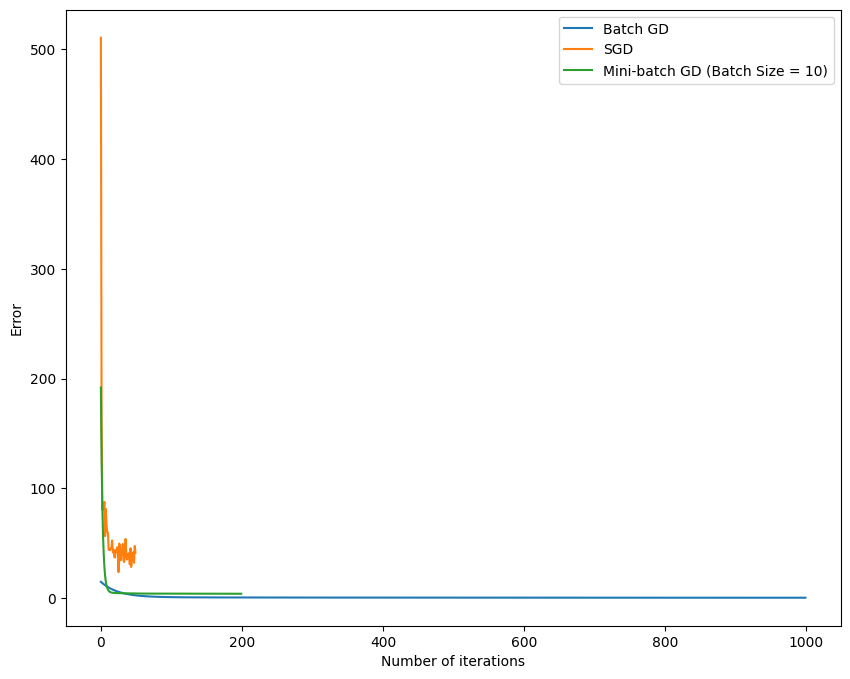

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history

def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Test Batch GD
lr_batch = 0.01
n_iter_batch = 1000
y_pred_batch = np.random.randn(2, 1)
X_b_batch = np.c_[np.ones((len(X), 1)), X]
y_pred_batch, cost_history_batch = gradient_descent(X_b_batch, y, y_pred_batch, lr_batch, n_iter_batch)

# Test SGD
lr_sgd = 0.5
n_iter_sgd = 50
y_pred_sgd = np.random.randn(2, 1)
X_b_sgd = np.c_[np.ones((len(X), 1)), X]
y_pred_sgd, cost_history_sgd = stochastic_gradient_descent(X_b_sgd, y, y_pred_sgd, lr_sgd, n_iter_sgd)

# Test Mini-batch GD with different batch size
lr_minibatch = 0.1
n_iter_minibatch = 200
batch_size_minibatch = 10
y_pred_minibatch = np.random.randn(2, 1)
y_pred_minibatch, cost_history_minibatch = minibatch_gradient_descent(X, y, y_pred_minibatch, lr_minibatch, n_iter_minibatch, batch_size_minibatch)

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter_batch), cost_history_batch, label='Batch GD')
ax.plot(range(n_iter_sgd), cost_history_sgd, label='SGD')
ax.plot(range(n_iter_minibatch), cost_history_minibatch, label=f'Mini-batch GD (Batch Size = {batch_size_minibatch})')

ax.legend()
plt.show()
